# <center>Tarea</center>  
## <center> NOMBRE: Gemberth Josue Delgado Delgado</center> 
## <center>CURSO: 6to "B"</center> 
## <center>ASIGNATURA: MODELAMIENTO Y SIMULACIÓN</center> 
## <center>DOCENTE: JORGE ANIBAL MOYA DELGADO</center> 


# 1.	Se ha observado que las ventas de un artículo en particular son 450, 475 ó 500, artículos por semana con probabilidades de 0,25; 0,40; y 0,35 respectivamente. Los tiempos de anticipación entre hacer y recibir un pedido son de 1, 2, y 3 semanas con probabilidades de 0,75; 0,20 y 0,05 respectivamente. Usando los datos mostrados a continuación, determinar las existencias disponibles después de 15 semanas de operación simulada.
1. Cantidad constante de pedidos = 1,400 artículos
2. Punto de Pedido = 500 unidades
3. Nivel inicial de pedidos = 1,400
4. Costo de Ordenar = 25
5. Costo de mantenimiento = 1$
6. Costo por faltante = $10

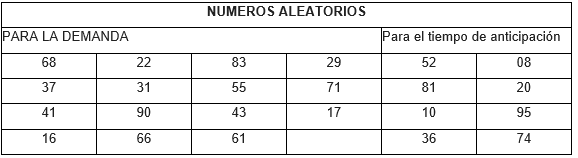



In [1]:
from math import sqrt
import pandas as pd
import numpy as np

In [26]:
#Programa para calcular el modelo EOQ

from math import sqrt

import pandas as pd

import numpy as np

# D = Demanda

# Co= Costo de ordenar

# Ch = Costo de Mantenimiento

# P = Costo del Producto: precio por unidad

# Q = Cantidad optima de pedido

#MO(QCosto Mínimo total

# N= númeor de pedidos

# T-tiempo entre pedido

# ChT= Costo anual de mantener

# CoT = Costo anual de ordenar

#MO(Q) = Costo total de Inventario
D = 1400.00
Co = 25.00
Ch = 1.00
P = 2.50
Tespera = 5
DiasAno = 250
Q = round(sqrt(((2*Co*D)/Ch)),2)
N = round(D / Q,2)
R = round((D / DiasAno) * Tespera,2)
T = round(DiasAno / N,2)
CoT = N * Co
ChT = round(Q / 2 * Ch,2)
MOQ = round(CoT + ChT,2)
CTT = round(P * D + MOQ,2)
print("Cantidad Optima de Pedito Q = ",Q)
print("Costo total de Ordenar CoT =", CoT)
print("Costo total de Mantener Inventario ChT =", ChT)
print("Costo Total de Ordenar y Mantener Inventario MO(O)", MOQ)
print("Costo Total del Sistema de Inventario CTT", CTT)
print("Número total de pedidos",N)
print("Punto de reorden = R",R)
print("Tiempo de Pedido",T)

Cantidad Optima de Pedito Q =  264.58
Costo total de Ordenar CoT = 132.25
Costo total de Mantener Inventario ChT = 132.29
Costo Total de Ordenar y Mantener Inventario MO(O) 264.54
Costo Total del Sistema de Inventario CTT 3764.54
Número total de pedidos 5.29
Punto de reorden = R 28.0
Tiempo de Pedido 47.26


In [21]:
indice = ['Q','Costo_ordenar','Costo_Mantenimiento','Costo_total','Diferencia_Costo_Total']

In [22]:
from pandas import DataFrame
import numpy as np
import matplotlib as plt
periodo = np.arange(1,19)
def genera_lista(Q):
    n=18
    Q_Lista = []
    i=1
    Qi = Q
    Q_Lista.append(Qi)
    for i in range(1,9):
        Qi = Qi - 60
        Q_Lista.append(Qi)
    Qi = Q
    for i in range(9, n):
        Qi = Qi + 60
        Q_Lista.append(Qi)
    return Q_Lista

Lista= genera_lista(Q)
Lista.sort()
dfQ = DataFrame(index=periodo, columns=indice).fillna(0)
dfQ['Q'] = Lista
for period in periodo:
    dfQ['Costo_ordenar'][period] = D * Co / dfQ['Q'][period]
    dfQ['Costo_Mantenimiento'][period] = dfQ['Q'][period] * Ch / 2
    dfQ['Costo_total'][period] = dfQ['Costo_ordenar'][period] + dfQ['Costo_Mantenimiento'][period]
    dfQ['Diferencia_Costo_Total'][period] = dfQ['Costo_total'][period] - MOQ
dfQ

<ipython-input-22-6a25db236cd5>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfQ['Costo_ordenar'][period] = D * Co / dfQ['Q'][period]
<ipython-input-22-6a25db236cd5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfQ['Costo_Mantenimiento'][period] = dfQ['Q'][period] * Ch / 2
<ipython-input-22-6a25db236cd5>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfQ['Costo_total'][period] = dfQ['Costo_ordenar'][period] + dfQ['Costo_Ma

,Q,Costo_ordenar,Costo_Mantenimiento,Costo_total,Diferencia_Costo_Total
1,-215.42,-162,-107,-269,-533
2,-155.42,-225,-77,-302,-566
3,-95.42,-366,-47,-413,-677
4,-35.42,-988,-17,-1005,-1269
5,24.58,1423,12,1435,1170
6,84.58,413,42,455,190
7,144.58,242,72,314,49
8,204.58,171,102,273,8
9,264.58,132,132,264,0
10,324.58,107,162,269,4


<AxesSubplot:>

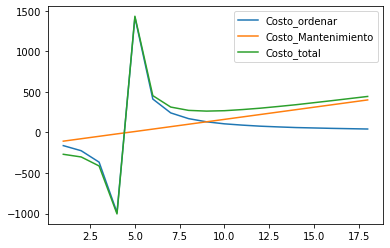

In [24]:
dfG = dfQ.loc[:,'Costo_ordenar':'Costo_total']
dfG
dfG.plot()

In [11]:
import numpy as np
from pandas import DataFrame
def make_data(product, policy, periods):
    """ Returns dataframe with the details of the inventory simulation.
    Keyword arguments:
    product -- Product object
    policy -- dict that contains the policy name and parameters. For example:
    policy = {'method': "Qs",
    'param1': 20000,
    'param2': 10000
    }
    periods -- numbers of periods of the simulation
    """
    periods += 1
    # Create zero-filled Dataframe
    period_lst = np.arange(periods) # index
    # Abbreviations
    # INV_INICIAL: INV_NETO_INICIALtial inventory position
    # INV_NETO_INICIAL: INV_NETO_INICIALtial net inventory
    # D: Demand
    # INV_FINAL: Final inventory position
    # INV_FINAL_NETO: Final net inventory
    # LS: Lost sales
    # AVG: Average inventory
    # ORD: order quantity
    # LT: lead time
    header = ['INV_INICIAL','INV_NETO_INICIAL','DEMANDA', 'INV_FINAL',
              'INV_FINAL_NETO', 'VENTAS_PERDIDAS', 'INV_PROMEDIO', 'CANT_ORDENAR', 'TIEMPO_LLEGADA']

    df = DataFrame(index=period_lst, columns=header).fillna(0)
    # Create a list that will store each period order
    order_l = [Order(quantity=0, lead_time=0)
        for x in range(periods)]
    
    # Fill DataFrame
    for period in period_lst:
        if period == 0:
            df['INV_INICIAL'][period] = product.initial_inventory
            df['INV_NETO_INICIAL'][period] = product.initial_inventory
            df['INV_FINAL'][period] = product.initial_inventory
            df['INV_FINAL_NETO'][period] = product.initial_inventory
        if period >= 1:
            df['INV_INICIAL'][period] = df['INV_FINAL'][period - 1] + order_l[period - 1].quantity
            df['INV_NETO_INICIAL'][period] = df['INV_FINAL_NETO'][period - 1] + pending_order(order_l, period)
            #demand = int(product.demand())
            demand = 20
            # We can't have negative demand
            if demand > 0:
                df['DEMANDA'][period] = demand
            else:
                df['DEMANDA'][period] = 0
            if df['INV_INICIAL'][period] - df['DEMANDA'][period] < 0:
                df['INV_FINAL'][period] = 0
            else:
                df['INV_FINAL'][period] = df['INV_INICIAL'][period] - df['DEMANDA'][period]
                
            order_l[period].quantity, order_l[period].lead_time = placeorder(product, df['INV_FINAL'][period], policy, period)
            df['INV_FINAL_NETO'][period] = df['INV_NETO_INICIAL'][period] - df['DEMANDA'][period]  #Line 58
            if df['INV_FINAL_NETO'][period] < 0:
                df['VENTAS_PERDIDAS'][period] = abs(df['INV_FINAL_NETO'][period])
                df['INV_FINAL_NETO'][period] = 0
            else:
                df['VENTAS_PERDIDAS'][period] = 0
            df['INV_PROMEDIO'][period] = (df['INV_NETO_INICIAL'][period] + df['INV_FINAL_NETO'][period]) / 2.0
            df['CANT_ORDENAR'][period] = order_l[period].quantity
            df['TIEMPO_LLEGADA'][period] = order_l[period].lead_time
    return df
                                                                  
def pending_order(order_l, period):
    """Return the order that arrives in actual period"""
    indices = [i for i, order in enumerate(order_l) if order.quantity]
    sum = 0
    for i in indices:
        if period - (i + order_l[i].lead_time + 1) == 0:
            sum += order_l[i].quantity
    return sum
                                                                               
def demand(self):
    if self.demand_dist == "Constant":
        return self.demand_p1
    elif self.demand_dist == "Normal":
        return make_distribution(
            np.random.normal,
            self.demand_p1,
            self.demand_p2)()
    elif self.demand_dist == "Triangular":
        return make_distribution(
            np.random_triangular,
            self.demand_p1,
            self.demand_p2,
            self.demand_p3
            )()
                                                                               
def lead_time(self):
    if self.leadtime_dist == "Constant":
        return self.leadtime_p1
    elif self.leadtime_dist == "Normal":
        return make_distribution(
            np.random.normal,
            self.leadtime_p1,
            self.leadtime_p2)()
    if self.leadtime_dist == "Triangular":
        return make_distribution(
            np.random.triangular,
            self.leadtime_p1,
            self.leadtime_p2,
            self.leadtime_p3
            )()
                                                                               
def __repr__(self):
    return '<Product %r>' % self.name
                                                                               
def placeorder(product, final_inv_pos, policy, period):
    """Place the order according the inventory policy:
    Keywords arguments:
    product -- object Product
    final_inv_pos -- final inventory position of period
    policy -- chosen policy Qs or RS
    period -- actual period
    Return:
    quantity to order
    lead time
    """
    #lead_time = int(product.lead_time())
    lead_time = 3
    # Qs = if we hit the reorder point s, order Q units
    if policy['method'] == 'Qs' and \
            final_inv_pos <= policy['param2']:
        return policy['param1'], lead_time
    # RS = if we hit the review period R and the reorder point S, order: (S -
    # final inventory pos)
    elif policy['method'] == 'RS' and \
        period % policy['param1'] == 0 and \
            final_inv_pos <= policy['param2']:
        return policy['param2'] - final_inv_pos, lead_time
    else:
        return 0, 0
                                                                               
politica = {'method': "Qs", 'param1': 50, 'param2': 20 }
    
class Order(object):
    """Object that stores basic data of an order"""

    def __init__(self, quantity, lead_time):
        self.quantity = quantity
        self.lead_time = lead_time

class product(object):
                                                                               
    def __init__ (self,name,price,order_cost,initial_inventory,demand_dist,demand_p1,
    demand_p2,demand_p3,leadtime_dist,leadtime_p1,leadtime_p2,leadtime_p3):
        self.name=name
        self.price=price
        self.order_cost=order_cost
        self.initial_inventory=initial_inventory
        self.demand_dist=demand_dist
        self.demand_p1=demand_p1
        self.demand_p2=demand_p2
        self.demand_p3=demand_p3
        self.leadtime_dist=leadtime_dist
        self.leadtime_p1=leadtime_p1
        self.leadtime_p2=leadtime_p2
        self.leadtime_p3=leadtime_p3
producto = product("Mesa", 18.0,20.0,100,"Constant",80.0,0.0,0.0,"Constant",1.0,0.0,0.0)
print(product)
df = make_data(producto, politica, 52)
print(df)

<class '__main__.product'>
    INV_INICIAL  INV_NETO_INICIAL  DEMANDA  INV_FINAL  INV_FINAL_NETO  \
0           100               100        0        100             100   
1           100               100       20         80              80   
2            80                80       20         60              60   
3            60                60       20         40              40   
4            40                40       20         20              20   
5            70                20       20         50               0   
6            50                 0       20         30               0   
7            30                 0       20         10               0   
8            60                50       20         40              30   
9            40                30       20         20              10   
10           70                10       20         50               0   
11           50                50       20         30              30   
12           30         

In [7]:
df.values

array([[100, 100,   0, 100, 100,   0,   0,   0,   0],
       [100, 100,  20,  80,  80,   0,  90,   0,   0],
       [ 80,  80,  20,  60,  60,   0,  70,   0,   0],
       [ 60,  60,  20,  40,  40,   0,  50,   0,   0],
       [ 40,  40,  20,  20,  20,   0,  30,  50,   3],
       [ 70,  20,  20,  50,   0,   0,  10,   0,   0],
       [ 50,   0,  20,  30,   0,  20,   0,   0,   0],
       [ 30,   0,  20,  10,   0,  20,   0,  50,   3],
       [ 60,  50,  20,  40,  30,   0,  40,   0,   0],
       [ 40,  30,  20,  20,  10,   0,  20,  50,   3],
       [ 70,  10,  20,  50,   0,  10,   5,   0,   0],
       [ 50,  50,  20,  30,  30,   0,  40,   0,   0],
       [ 30,  30,  20,  10,  10,   0,  20,  50,   3],
       [ 60,  60,  20,  40,  40,   0,  50,   0,   0],
       [ 40,  40,  20,  20,  20,   0,  30,  50,   3],
       [ 70,  20,  20,  50,   0,   0,  10,   0,   0],
       [ 50,  50,  20,  30,  30,   0,  40,   0,   0],
       [ 30,  30,  20,  10,  10,   0,  20,  50,   3],
       [ 60,  60,  20,  40, 